# Lab 03: Fun with `pandas`!

Below are some exercises to get you working with `pandas` to manipulate data. As always, get as far as you can, and ask for help when you need it! Your teacher (me), you instructor, and your classmates are all here to help each other get better at coding. Getting the code to work is important, but do also take the time to make sure you understand what the commands are doing. This time, (with the exception of the Stroop challenge), all I've given you is the code to download the data. Then you are on your own. For the Stroop challenge, I gave the you code for the first step—after that, it's up to you :-)

## Music sales challenge

Write a script that:

1. Combines the tables of best-selling physical singles and best-selling digital singles on the Wikipedia page "List_of_best-selling_singles"
2. Adds a column which marks whether each row is from the list of physical singles or digital singles
3. Outputs the artist and single name for the year you were born. If there is no entry for that year, take the closest year after you were born.
4. Outputs the artist and single name for the year you were 15 years old.

In [5]:
# Starter code...

#%pip install lxml
import pandas as pd

rawdata = pd.read_html("https://en.wikipedia.org/wiki/List_of_best-selling_singles")



<class 'list'>


In [43]:
# print the names of columns from each element in rawdata list
for i in range(len(rawdata)):
    print(f"Element {i} has columns: {rawdata[i].columns}")

Element 0 has columns: Index(['Artist', 'Single', 'Year', 'Sales', 'Source'], dtype='object')
Element 1 has columns: Index(['Artist', 'Single', 'Year', 'Sales', 'Source'], dtype='object')
Element 2 has columns: Index(['Artist', 'Single', 'Year', 'Sales'], dtype='object')
Element 3 has columns: Index(['Artist', 'Single', 'Year', 'Sales', 'Source'], dtype='object')
Element 4 has columns: Index(['Artist', 'Single', 'Year', 'Sales', 'Source'], dtype='object')
Element 5 has columns: Index(['Artist', 'Single', 'Year', 'Units (in billions)', 'Source'], dtype='object')
Element 6 has columns: Index(['Year', 'Artist', 'Single', 'Source'], dtype='object')
Element 7 has columns: Index(['Year', 'Artist', 'Single', 'Sales', 'Source'], dtype='object')
Element 8 has columns: Index(['vteLists of best-selling singles', 'vteLists of best-selling singles.1'], dtype='object')
Element 9 has columns: Index(['vteMusic industry', 'vteMusic industry.1'], dtype='object')
Element 10 has columns: Index([0, 1], dty

In [64]:
# for each column in each element in rawdata list, rename columns Sales (in millions) to Sales, and Released to Year, Certified sales to Sales etc.
for i in range(len(rawdata)):
    if 'Sales (in millions)' in rawdata[i].columns:
        rawdata[i] = rawdata[i].rename(columns={'Sales (in millions)': 'Sales'})
    if 'Sales (in millions)[b]' in rawdata[i].columns:
        rawdata[i] = rawdata[i].rename(columns={'Sales (in millions)[b]': 'Sales'})
    if 'Released' in rawdata[i].columns:
        rawdata[i] = rawdata[i].rename(columns={'Released': 'Year'})
    if 'Certified sales' in rawdata[i].columns:
        rawdata[i] = rawdata[i].rename(columns={'Certified sales': 'Sales'})
    if 'Certified Sales' in rawdata[i].columns:
        rawdata[i] = rawdata[i].rename(columns={'Certified Sales': 'Sales'})

# make a separate dataframe physical for element 0 and 1 
physical = rawdata[0]
# concatenate element physical with rawdata[1] 
physical = pd.concat([physical, rawdata[1]], ignore_index=True)

# add another column "Digital" filled with zeros to physical dataframe
physical['Digital'] = 0

# make a separate dataframe digital for element 3 and 
digital = rawdata[3]
# concatenate element digital with rawdata[4]
digital = pd.concat([digital, rawdata[4]], ignore_index=True)

# add another column "Digital" filled with ones to digital dataframe
digital['Digital'] = 1

# concatenate physical and digital dataframes
df_1 = pd.concat([physical, digital], ignore_index=True)

# and sort by Year
df_1 = df_1.sort_values(by='Year')

# for the dataframe df_1, print the artist, and the single name for the year 2002, if there is no entry for this year, print this for the nearest year after 2002
print(df_1[df_1['Year'] >= 2002].iloc[0][['Artist', 'Single', 'Year']])

# and do the same for the year 2017 when I was 15 
print(df_1[df_1['Year'] >= 2017].iloc[0][['Artist', 'Single', 'Year']])

Artist                 O-Zone
Single    "Dragostea din tei"
Year                     2003
Name: 19, dtype: object
Artist    Ed Sheeran
Single     "Perfect"
Year            2017
Name: 48, dtype: object


## Space challenge

1. Make a single dataframe that combines the space missions from the 1950's to the 2020's
2. Write a script that returns the year with the most launches
3. Write a script that returns the most common month for launches
4. Write a script that ranks the months from most launches to fewest launches


In [65]:
%pip install lxml
import pandas as pd

rawdata = pd.read_html("https://en.wikipedia.org/wiki/Timeline_of_Solar_System_exploration")

Note: you may need to restart the kernel to use updated packages.


In [112]:
# concatenate elements 0 through 7 into a single dataframe
df_space = pd.concat(rawdata[0:8], ignore_index=True)

# from the df_space dataframe, take the four last digits from each row in the colum Launch date and put them in a new column called Year
df_space['Year'] = df_space['Launch date'].str[-4:]

# add another column "Launches", which counts the total amount of launches for each year
df_space['Launches p.a.'] = df_space.groupby('Year')['Year'].transform('count')

# print the year with the most launches and the number of launches
print("The most Launches were in: ",df_space[df_space['Launches p.a.'] == df_space['Launches p.a.'].max()]['Year'].iloc[0])

# from the df_space dataframe, extract characters only and from the Launch data and save it in a new column called Month
df_space['Month'] = df_space['Launch date'].str.extract(r'([A-Za-z]+)')

# print the month which occurs the most often in the df_space dataframe
print("The most common month for launches is: ",df_space['Month'].mode()[0])

# add another column "Launches p.m.", which counts the total amount of launches for each month
df_space['Launches p.m.'] = df_space.groupby('Month')['Month'].transform('count')

# and print the amount of launches for each month, and sort by launches
print(df_space[['Month', 'Launches p.m.']].drop_duplicates().sort_values(by='Launches p.m.', ascending=False))


The most Launches were in:  1965
The most common month for launches is:  November
        Month  Launches p.m.
1    November             30
11     August             27
0     October             22
6   September             22
22       July             21
4     January             19
37   December             19
30        May             17
3       March             15
2    February             14
32       June             14
10      April             13


## Supervillain challenge

1. Write a script that combines the tables showing supervillain debuts from the 30's through the 2010's
2. Write a script that ranks each decade in terms of how many supervillains debuted in that decade
3. Write a script that ranks the different comics companies in terms of how many supervillains they have, and display the results in a nice table (pandas dataframe)

In [115]:
rawdata = pd.read_html("https://en.wikipedia.org/wiki/List_of_comic_book_supervillain_debuts")


In [129]:
# concatenate elements 3 through 11 into a single dataframe df_villains
df_villains = pd.concat(rawdata[3:12], ignore_index=True)

# add another column year, which contains only the year from the Year Debuted column
df_villains['Year'] = df_villains['Year Debuted'].str.extract(r'(\d{4})')

# add another column "Decade" which contains the decade for each row
df_villains['Decade'] = df_villains['Year'].str[:3] + '0s'

# count the amount of occurences for each Decade and print in descending order
print(df_villains['Decade'].value_counts().sort_index())

# count the amount of occurences for each Company and save in a new dataframe df_companies, one column for company and one for count of villains
df_companies = df_villains['Company'].value_counts().reset_index()

print(df_companies)


Decade
1930s      4
1940s     47
1950s     26
1960s    228
1970s     97
1980s     92
1990s     84
2000s     49
2010s      9
Name: count, dtype: int64
                     Company  count
0                         DC    338
1                     Marvel    264
2          Fawcett Comics/DC      6
3                      Image      5
4                 Dark Horse      5
5              Marvel/Timely      4
6            Disney/Hyperion      4
7                   Eternity      3
8   Lev Gleason Publications      1
9                     Comico      1
10                    Mirage      1
11              Image Comics      1


## Stroop challenge

Every year between 2015 and 2021, the students in my Language, Cognition, and the Brain course participated in a version of the Stroop task. Using a stopwatch (ok, using their phones), they recorded how fast they could say a list of things (either reading or naming colors or color words). The column names mean "Reading with No Interference", "Naming with Interference", "Naming with No Interference", and "Reading with Interference". The times are in seconds.

### Stroop challenge 1: 
Transform these data from wide format to long format, so that the result is a dataframe with
- 1 column named "Participant_id" with a unique number for each participant (you can use the row indices)
- 1 column named "Year" with the year data
- 1 column named "Task" that shows which task they were doing
- 1 column named "RT" that shows their response time

In [149]:
# Starter code 1...

df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/Stroop/master/Stroop-raw-over-the-years.csv")

# First we add Participant_id column based on the row number
df['Participant_id'] = df.index + 1

# and make participant_id as a first column, and Year into a second column
df = df[['Participant_id', 'Year'] + [col for col in df.columns if col not in ['Participant_id', 'Year']]]

# second, we transform to long format by melting the dataframe into a new columns "RT" and "Task"
df = df.melt(id_vars=['Participant_id', 'Year'], var_name='Task', value_name='RT')

# and sort by Participant_id 
df = df.sort_values(by='Participant_id')

df


,Participant_id,Year,Task,RT
0,1,2015,Reading_NoInt,4.16
182,1,2015,Naming_Int,6.76
546,1,2015,Reading_Int,4.65
364,1,2015,Naming_NoInt,4.45
547,2,2015,Reading_Int,4.46
...,...,...,...,...
180,181,2021,Reading_NoInt,5.16
363,182,2021,Naming_Int,10.40
181,182,2021,Reading_NoInt,4.27
545,182,2021,Naming_NoInt,5.32


## Stroop challenge 2 (Advanced!!!):

Make a new dataframe which shows the mean response time (in seconds) for each task for each year.

In [ ]:
!pip install seaborn

In [154]:
# we make another dataframe containing mean reaction times for each task for each year
df_mean = df.groupby(['Year', 'Task'])['RT'].mean().reset_index()

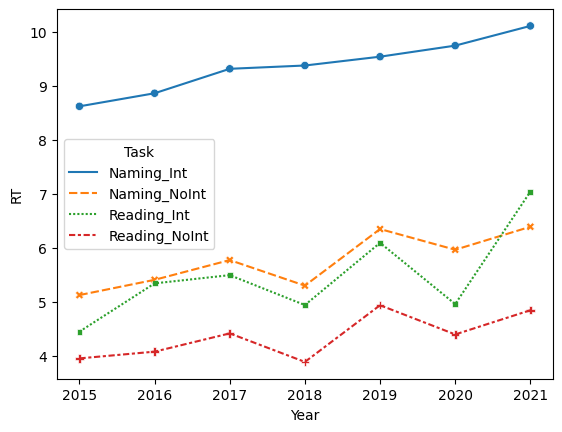

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

# We can Visualize the mean reaction times for each task for each year as scatter plot with added lines connecting the points
sns.scatterplot(data=df_mean, x='Year', y='RT', hue='Task', style='Task', legend=False)
sns.lineplot(data=df_mean, x='Year', y='RT', hue='Task', style='Task')
plt.show()

# The growing overall trend in reaction times across years shows that the participants are getting progressively slower haha

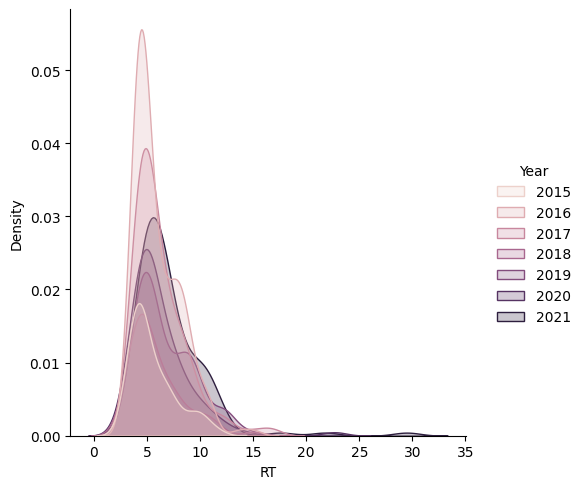

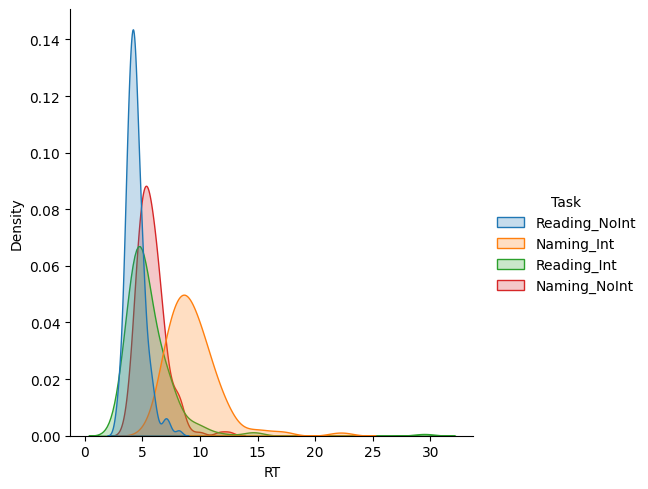

In [153]:
# we visualize the reaction times as a densities per year

sns.displot(df, x='RT', hue='Year', kind='kde', fill=True)
plt.show()

# and also by Task
sns.displot(df, x='RT', hue='Task', kind='kde', fill=True)

# The plots show clear log-normal distribution of reaction times for each year and task, with 
# the clear shift of the distributions in the tasks with interference compared to the tasks without interference